In [1]:
import awkward as ak
import uproot
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt

In [2]:
from coffea.nanoevents import NanoEventsFactory, BaseSchema

In [3]:
gen_pt_all = []
gen_eta_all = []

In [6]:
for filename in os.listdir('/ecoderemdvol/EleGun/EPGun-PU200/data/hgcal_ntuples/0000/'):
    f = os.path.join('/ecoderemdvol/EleGun/EPGun-PU200/data/hgcal_ntuples/0000/', filename)
    # checking if it is a file
    if os.path.isfile(f):
        signaldomain = f
        signalfile = uproot.open(signaldomain)
        
        events = NanoEventsFactory.from_root(
            signalfile,
            treepath='FloatingpointThreshold0DummyHistomaxGenmatchGenclustersntuple/HGCalTriggerNtuple',
            #entry_stop=10,
            #metadata={"dataset": "llp"},
            schemaclass=BaseSchema,
        ).events()
        
        gen_pt = events.gen_pt[:,0]
        gen_eta = events.gen_eta[:,0]    
        
        gen_pt_all = np.append(gen_pt_all,gen_pt)
        gen_eta_all = np.append(gen_eta_all,gen_eta)

In [8]:
signaldomain = '/ecoderemdvol/EleGun/EPGun-PU200/data/hgcal_ntuples/1/ntuple_10.root'
signalfile = uproot.open(signaldomain)

In [9]:
events = NanoEventsFactory.from_root(
    signalfile,
    treepath='FloatingpointThreshold0DummyHistomaxGenmatchGenclustersntuple/HGCalTriggerNtuple',
    #entry_stop=10,
    #metadata={"dataset": "llp"},
    schemaclass=BaseSchema,
).events()

In [10]:
gen_pt = events.gen_pt[:,0]
gen_eta = events.gen_eta[:,0]

In [11]:
gen_pt_all = np.append(gen_pt_all,gen_pt)
gen_eta_all = np.append(gen_eta_all,gen_eta)

In [18]:
count = np.count_nonzero(gen_pt_all < 35)
count

11012

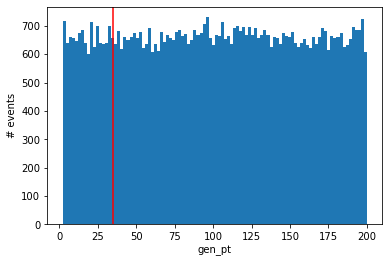

In [13]:
plt.hist(gen_pt_all,100);
plt.xlabel('gen_pt')
plt.ylabel('# events')
plt.axvline(x = 35,color = 'red')

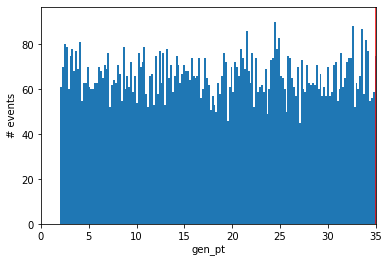

In [19]:
plt.hist(gen_pt_all,1000);
plt.xlim(0,35)
plt.xlabel('gen_pt')
plt.ylabel('# events')
plt.axvline(x = 35,color = 'red')

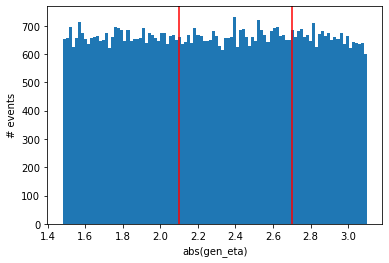

In [20]:
plt.hist(abs(gen_eta_all),100);
plt.xlabel('abs(gen_eta)')
plt.ylabel('# events')
plt.axvline(x = 2.1,color = 'red')
plt.axvline(x = 2.7,color = 'red')

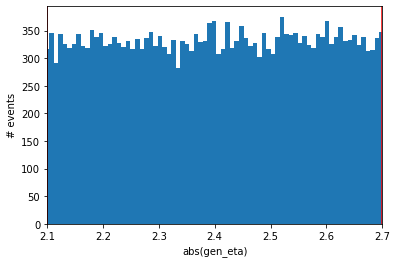

In [21]:
plt.hist(abs(gen_eta_all),200);
plt.xlim(2.1,2.7)
plt.xlabel('abs(gen_eta)')
plt.ylabel('# events')
plt.axvline(x = 2.1,color = 'red')
plt.axvline(x = 2.7,color = 'red')

In [22]:
pt_mask = (gen_pt_all <=35)
eta_min_mask = (gen_eta_all>=2.1)
eta_max_mask = (gen_eta_all <= 2.7)

mask = ak.Array(np.logical_and(np.asarray(pt_mask),np.asarray(eta_min_mask),np.asarray(eta_max_mask)))

Total events 

In [23]:
count = np.count_nonzero(mask)
count

3317

only layer 9 5 elinks data

In [25]:
tc_data  = pd.read_csv('/ecoderemdvol/EleGun/low_pt_high_eta/data/nElinks_5/5Elinks_data.csv')

Text(0, 0.5, '# wafers')

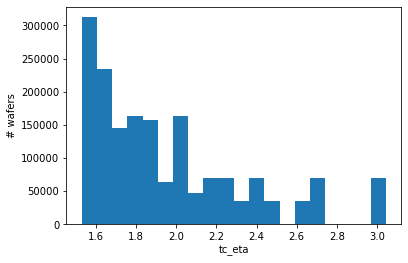

In [28]:
plt.hist(tc_data['tc_eta'],20)
plt.xlabel('tc_eta')
plt.ylabel('# wafers')

Text(0, 0.5, '# wafers')

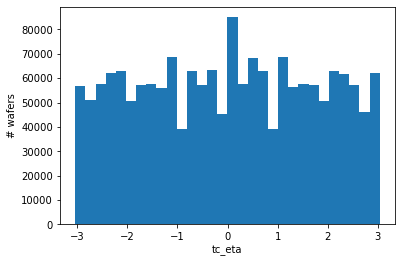

In [30]:
plt.hist(tc_data['tc_phi'],30)
plt.xlabel('tc_eta')
plt.ylabel('# wafers')

In [33]:
CALQ_COLS = ['CALQ_%i'%c for c in range(0, 48)]
input_calQ = tc_data[CALQ_COLS]

In [36]:
occupancy_0MT = np.count_nonzero(input_calQ,axis=1)
occupancy_1MT = np.count_nonzero(input_calQ>1.,axis=1)

Text(0, 0.5, '# wafers')

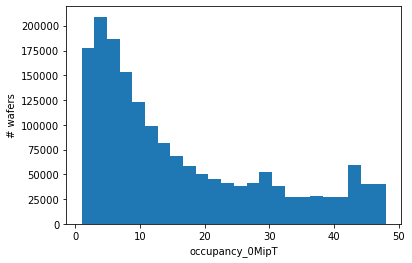

In [39]:
plt.hist(occupancy_0MT,24)
plt.xlabel('occupancy_0MipT')
plt.ylabel('# wafers')

Text(0, 0.5, '# wafers')

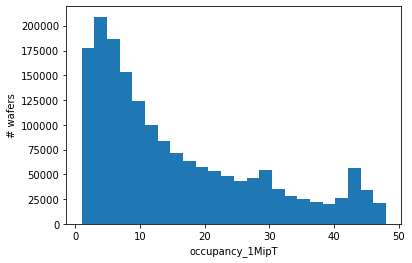

In [40]:
plt.hist(occupancy_1MT,24)
plt.xlabel('occupancy_1MipT')
plt.ylabel('# wafers')

Text(0, 0.5, 'tc_eta')

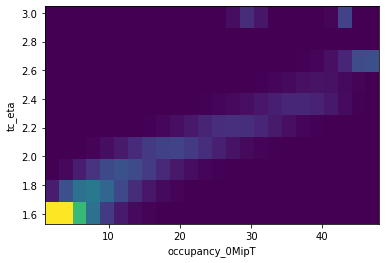

In [45]:
plt.hist2d(occupancy_0MT,tc_data['tc_eta'],bins=(24,10));
plt.xlabel('occupancy_0MipT')
plt.ylabel('tc_eta')

Text(0, 0.5, 'tc_eta')

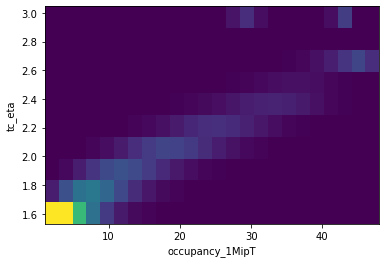

In [44]:
plt.hist2d(occupancy_1MT,tc_data['tc_eta'],bins=(24,10));
plt.xlabel('occupancy_1MipT')
plt.ylabel('tc_eta')